In [1]:
import pandas as pd
import os
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve,auc,mean_squared_error
from sklearn import tree, metrics
#getting the data
o=pd.read_excel("Credit card approval.xls")
#renaming the columns
o.columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
'A13', 'A14', 'A15',
'classified']
o.head()
#checking for null value and replacing it
#replacing by mean if continuous data
#replacing by mode if categorical data
o['A1']=o['A1'].replace('?',np.NaN)
o['A1'].isna().sum()
o=o.replace('?',np.NaN)
o['A1'].mode()[0]
o['A1'].fillna(o['A1'].mode()[0],inplace=True)
o['A4'].fillna(o['A1'].mode()[0],inplace=True)
o['A5'].fillna(o['A1'].mode()[0],inplace=True)
o['A6'].fillna(o['A1'].mode()[0],inplace=True)
o['A7'].fillna(o['A1'].mode()[0],inplace=True)
o['A9'].fillna(o['A1'].mode()[0],inplace=True)
o['A10'].fillna(o['A1'].mode()[0],inplace=True)
o['A12'].fillna(o['A1'].mode()[0],inplace=True)
o['A13'].fillna(o['A1'].mode()[0],inplace=True)
o['A2'].fillna(o['A2'].mean(),inplace=True)
o['A3'].fillna(o['A2'].mean(),inplace=True)
o['A8'].fillna(o['A2'].mean(),inplace=True)
o['A11'].fillna(o['A2'].mean(),inplace=True)
o['A14'].fillna(o['A2'].mean(),inplace=True)
o['A15'].fillna(o['A2'].mean(),inplace=True)

In [2]:
o.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,classified
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
#converting categorical columns to continuous
o_new=pd.get_dummies(o,drop_first=True)
#splitting the classified column from rest of data
u=o_new.iloc[:,:-1]
v=o_new.iloc[:,-1]

The results for 1 out of 5
Misclassified samples: 40
Accuracy: 0.71
True negative: 78
True positive: 20
false negative: 27
false positive: 13
precision: 0.61
recall: 0.43
F_score: 0.50
MSE: 0.29

The results for 2 out of 5
Misclassified samples: 27
Accuracy: 0.80
True negative: 93
True positive: 18
false negative: 1
false positive: 26
precision: 0.41
recall: 0.95
F_score: 0.57
MSE: 0.20

The results for 3 out of 5
Misclassified samples: 26
Accuracy: 0.81
True negative: 1
True positive: 111
false negative: 20
false positive: 6
precision: 0.95
recall: 0.85
F_score: 0.90
MSE: 0.19

The results for 4 out of 5
Misclassified samples: 32
Accuracy: 0.77
True negative: 35
True positive: 71
false negative: 29
false positive: 3
precision: 0.96
recall: 0.71
F_score: 0.82
MSE: 0.23

The results for 5 out of 5
Misclassified samples: 20
Accuracy: 0.86
True negative: 39
True positive: 79
false negative: 7
false positive: 13
precision: 0.86
recall: 0.92
F_score: 0.89
MSE: 0.14



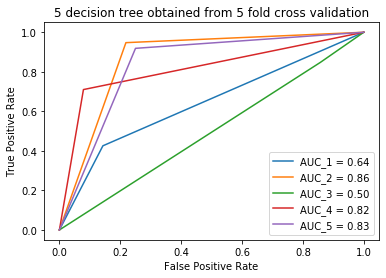

In [6]:
#Code for Decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)
kf=KFold(n_splits=5)
count=1
for train_index,test_index in kf.split(o_new):
    X_train, X_test, y_train, y_test=u.iloc[train_index],u.iloc[test_index],v.iloc[train_index],v.iloc[test_index]
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    print("The results for "+str(count)+" out of 5")
    count_misclassified = (y_test != y_pred).sum()
    print('Misclassified samples: {}'.format(count_misclassified))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}'.format(accuracy))
    b=confusion_matrix(y_test,y_pred)
    tn=b[0][0]
    fp=b[0][1]
    fn=b[1][0]
    tp=b[1][1]
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    F_score=(2*precision*recall)/(precision+recall)
    fpr,tpr,_=roc_curve(y_test,y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC_'+str(count)+' = %0.2f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    count+=1
    #tn, fp, fn, tp = confusion_matrix(y_test,y_pred)
    print("True negative: "+str(tn))
    print("True positive: "+str(tp))
    print("false negative: "+str(fn))
    print("false positive: "+str(fp))
    print("precision: {:.2f}".format(precision))
    print("recall: {:.2f}".format(recall))
    print("F_score: {:.2f}".format(F_score))
    print("MSE: {:.2f}".format(mean_squared_error(y_test,y_pred)))
    print()
plt.title('5 decision tree obtained from 5 fold cross validation')
plt.legend(loc = 'lower right')
plt.show()